In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/%F0%9F%9A%97%20Tesla%20Daily%20Stocks%20Prices/tesla_stocks.csv')

In [3]:
df.isna().sum()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2959 non-null   object 
 1   Open       2959 non-null   float64
 2   High       2959 non-null   float64
 3   Low        2959 non-null   float64
 4   Close      2959 non-null   float64
 5   Adj Close  2959 non-null   float64
 6   Volume     2959 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,month_year
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,2010,6,2010-06
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010,6,2010-06
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010,7,2010-07
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010,7,2010-07
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010,7,2010-07


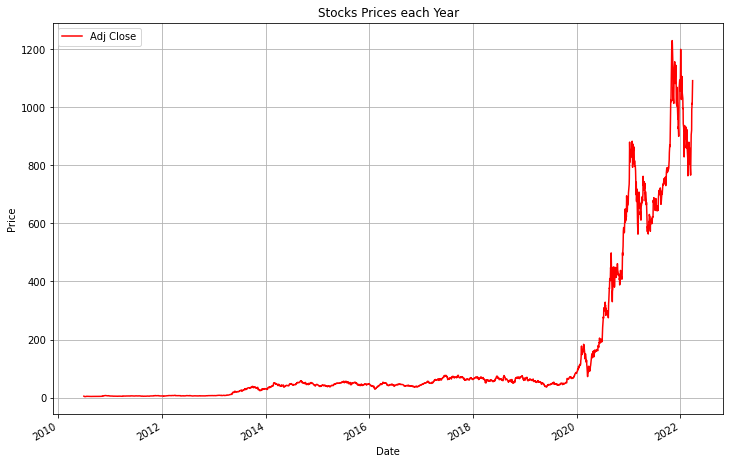

In [7]:
df[['Adj Close','Date']].groupby('Date').mean().plot(figsize=(12,8), color = 'r', grid = True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stocks Prices each Year')
plt.show()

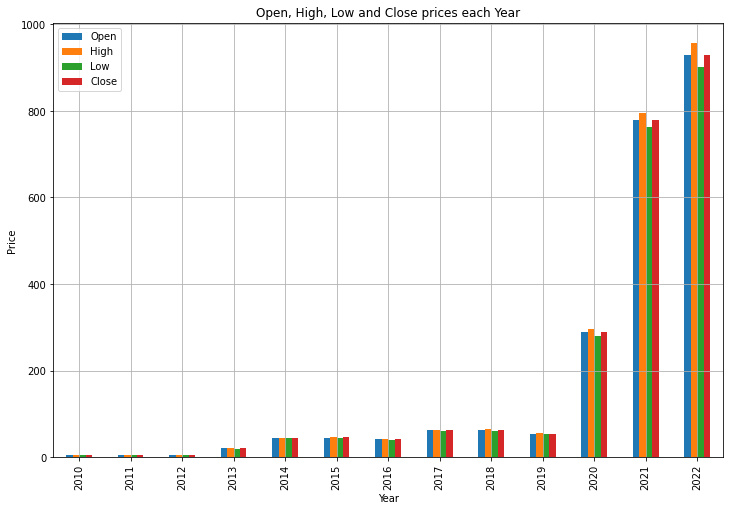

In [8]:
stocks_year = df.groupby(by='year').mean()
stocks_year[['Open','High','Low','Close']].plot(kind = 'bar', figsize = (12,8), grid = True)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Open, High, Low and Close prices each Year')
plt.show()

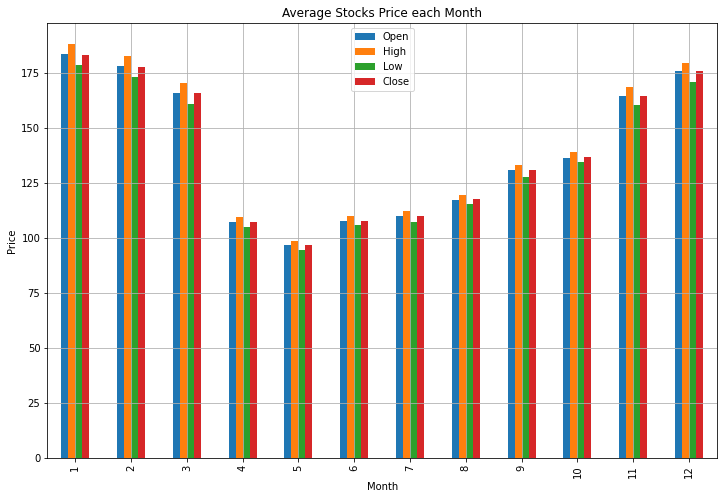

In [9]:
stocks_month = df.groupby(by='month').mean()
stocks_month[['Open','High','Low','Close']].plot(kind = 'bar', figsize = (12,8), grid = True)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average Stocks Price each Month')
plt.show()

<ipython-input-10-9b7aaf5de948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_close['start_end_changes'] = open_close['Open'] - open_close['Close']
<ipython-input-10-9b7aaf5de948>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_close['positive'] = open_close['start_end_changes'] > 0


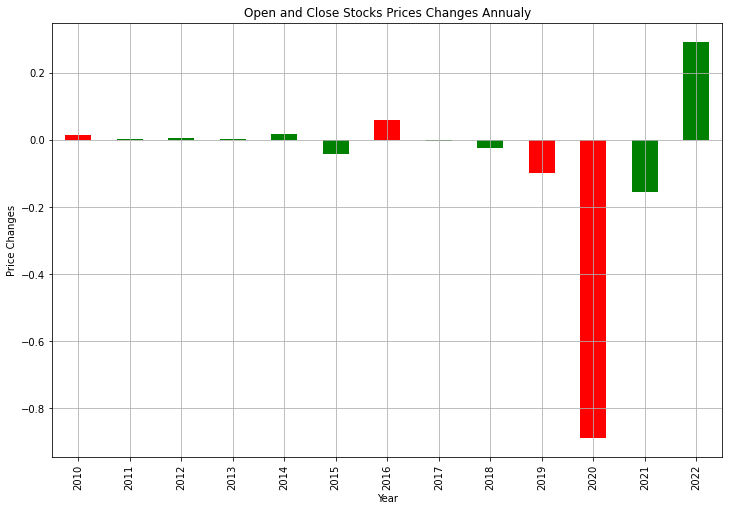

In [10]:
open_close = df[['month_year','Open','Close','year']]
open_close['start_end_changes'] = open_close['Open'] - open_close['Close']
open_close['positive'] = open_close['start_end_changes'] > 0
open_close.groupby('year').mean()['start_end_changes'].plot(kind = 'bar', grid = True,
    figsize = (12,8), color = open_close.positive.map({True: 'g', False: 'r'}))
plt.xlabel('Year')
plt.ylabel('Price Changes')
plt.title('Open and Close Stocks Prices Changes Annualy')
plt.show()

**Looks like the biggest difference between start and final price for a day were in 2020. Lets go deeper to 2020**

<ipython-input-11-0b775f47c69e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_close_2020['start_end_changes'] = open_close_2020['Open'] - open_close_2020['Close']
<ipython-input-11-0b775f47c69e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_close_2020['positive'] = open_close_2020['start_end_changes'] > 0


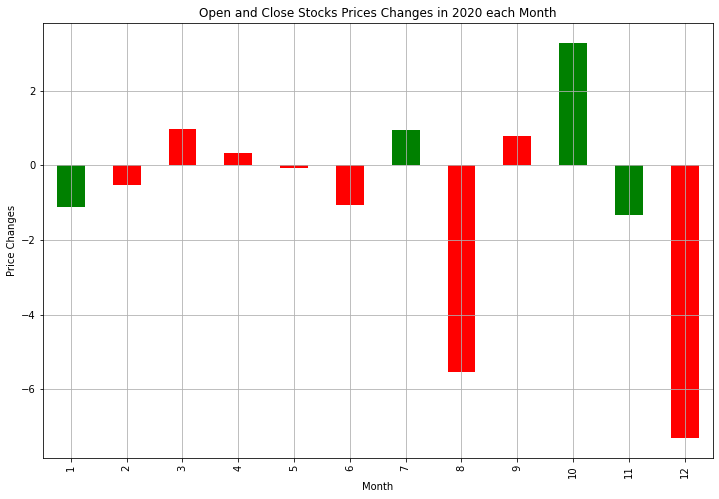

In [11]:
open_close_2020 = df[['month','Open','Close','year']]
open_close_2020['start_end_changes'] = open_close_2020['Open'] - open_close_2020['Close']
open_close_2020['positive'] = open_close_2020['start_end_changes'] > 0
open_close_2020[open_close_2020['year']==2020].groupby('month').mean()['start_end_changes'].plot(kind = 'bar', grid = True, figsize = (12,8),
        color = open_close.positive.map({True: 'r', False: 'g'}))
plt.xlabel('Month')
plt.ylabel('Price Changes')
plt.title('Open and Close Stocks Prices Changes in 2020 each Month')
plt.show()

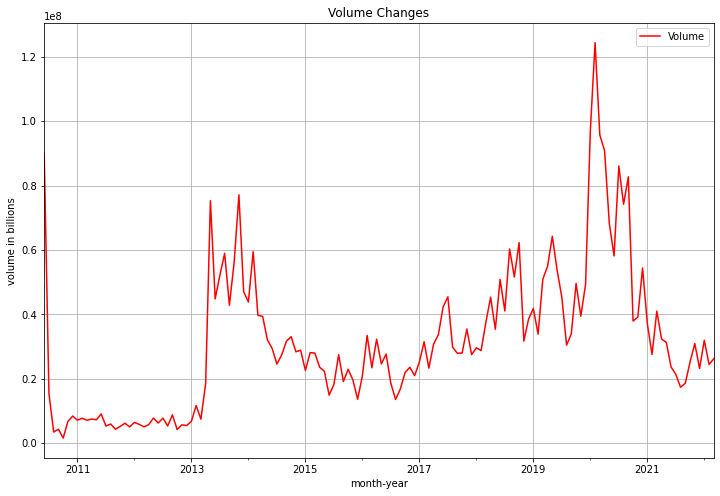

In [12]:
df[['month_year','Volume']].groupby('month_year').mean().plot(figsize = (12,8), color = 'r', grid = True,)
plt.xlabel('month-year')
plt.ylabel('volume in billions')
plt.title('Volume Changes')
plt.show()

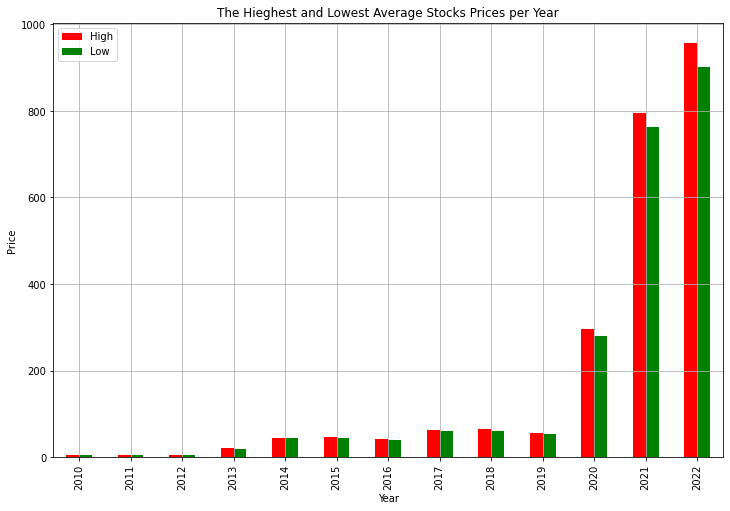

In [13]:
df[['year','High','Low']].groupby('year').mean().plot(kind = 'bar', 
        figsize = (12,8), grid = True, color = ['r','g'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('The Hieghest and Lowest Average Stocks Prices per Year')
plt.show()